In [1]:
import os
import glob
import pandas as pd
import numpy as np
import nibabel as nib
from nilearn.plotting import plot_stat_map
import matplotlib.pyplot as plt


/Users/zeynepenkavi/.pyenv/versions/3.8.3/envs/py-nvr-fmri/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
os.chdir('/Users/zeynepenkavi/Documents/RangelLab/NovelVsRepeated/fmri/analysis/01_level1/cluster_scripts')

In [3]:
fig_path = '/Users/zeynepenkavi/Documents/RangelLab/NovelVsRepeated/fmri/analysis/01_level1/figs'

Desired plot: Matrix of subjects in rows and sessions in columns of value and reward contrasts

In [4]:
base_path = '/Users/zeynepenkavi/CpuEaters/overtrained_decisions_bidsfmri'
contrasts_path = os.path.join(base_path, 'derivatives/nilearn/glm/level1')  


def label_matrix_row_cols(fig, a, cols, rows):
#     https://stackoverflow.com/questions/25812255/row-and-column-headers-in-matplotlibs-subplots
    for ax, col in zip(a[0], cols):
        ax.set_title(col)

    for ax, row in zip(a[:,0], rows):
        ax.set_ylabel(row, rotation=0, size='large')

def plot_stat_map_matrix(reg, task, mnum, contrasts_path, map_type, 
                         cut_coords = (10), threshold = 2, display_mode = 'y', 
                         black_bg = False, vmax = 6, fig_w = 12, fig_h = 24,
                         space = 'MNI152NLin2009cAsym_res-2', 
                         subnums = ['601', '609', '611', '619', '621', '629'], sessions = ['01', '02', '03']):
    
    fig, a = plt.subplots(len(subnums), len(sessions), figsize=(fig_w, fig_h))
    
    cols = ['ses-'+i for i in sessions]
    
    for ax, col in zip(a[0], cols):
        ax.set_title(col)
        
    fig.suptitle('%s-%s'%(task, reg))
    fig.subplots_adjust(top=0.95)
    
    for i, cur_sub in enumerate(subnums):
        for j, cur_ses in enumerate(sessions):

            anat_path = os.path.join(base_path, 'derivatives/sub-' + cur_sub + '/anat')

            stat_map_fn = 'sub-' + cur_sub + '_ses-' + cur_ses + '_task-' + task + '_space-' + space + '_' + mnum + '_' + reg + '_' + map_type + '.nii.gz'
            bg_img_fn = 'sub-'+ cur_sub + '_space-' + space + '_desc-preproc_T1w.nii.gz'

            cur_img = os.path.join(contrasts_path, task, mnum, 'sub-'+cur_sub, 'ses-'+cur_ses, 'contrasts', stat_map_fn)

            bg_img = os.path.join(anat_path, bg_img_fn)

            plot_stat_map(cur_img,
                          bg_img = bg_img,
                          cut_coords = cut_coords,
                          threshold = threshold, 
                          draw_cross=False, 
                          display_mode = display_mode, 
                          black_bg = black_bg,
                          axes = a[i, j],
                          vmax = vmax)

NameError: name 'mnum' is not defined

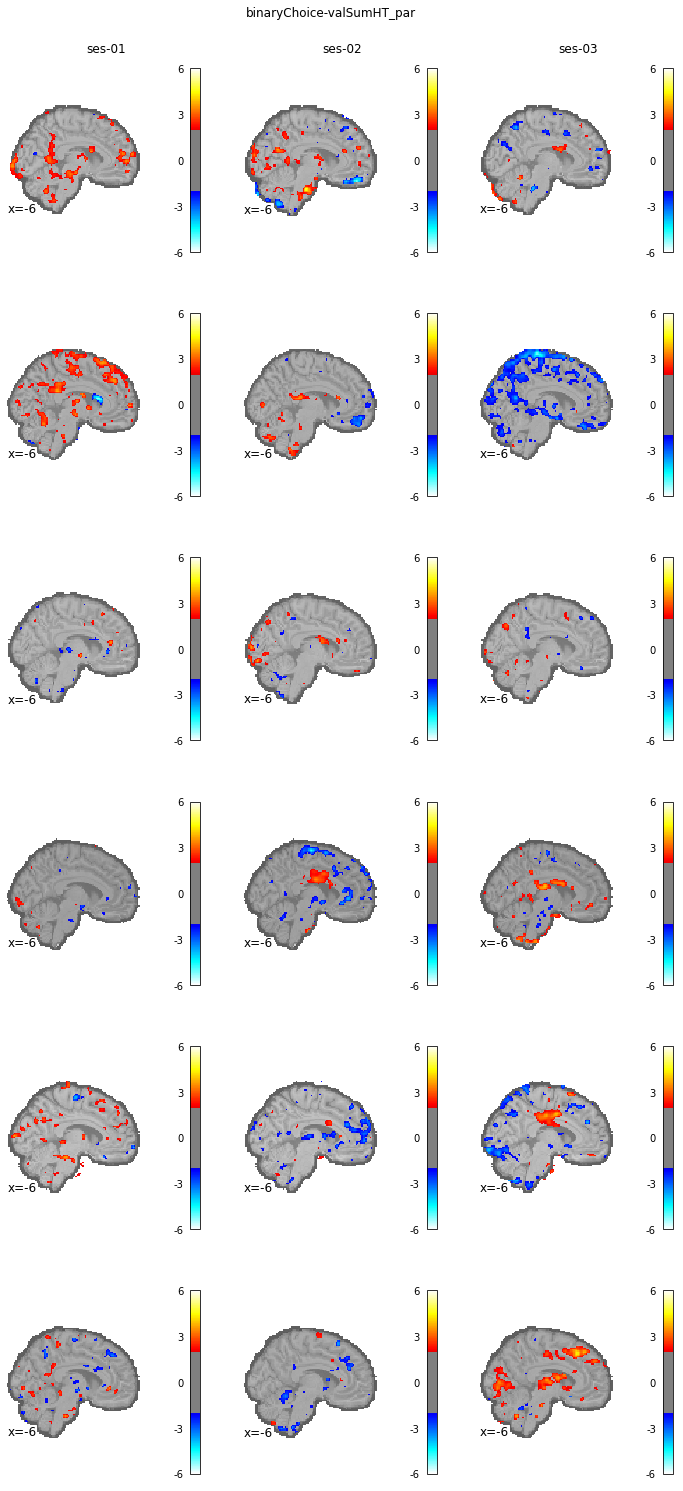

In [6]:
# 'reg':, 'task': , 'cut': , 'disp_mode':}

figs_list = [{'reg': 'valSumHT_par', 'task': 'binaryChoice', 'cut': -6, 'disp_mode': 'x'},
            {'reg': 'valSumHT_par', 'task': 'binaryChoice', 'cut': 4, 'disp_mode': 'x'},
            {'reg': 'valSumHT_par', 'task': 'binaryChoice', 'cut': 8, 'disp_mode': 'y'},
            {'reg': 'valSumHT_par', 'task': 'binaryChoice', 'cut': 24, 'disp_mode': 'y'},
            {'reg': 'valSumHT_par', 'task': 'binaryChoice', 'cut': 40, 'disp_mode': 'y'},
            {'reg': 'valSumHT_par', 'task': 'binaryChoice', 'cut': -6, 'disp_mode': 'z'}]

mnum = 'model1'
map_type = 'tmap'

for cur_dict in figs_list:
    reg = cur_dict['reg']
    task = cur_dict['task']
    cut = cur_dict['cut']
    disp_mode = cur_dict['disp_mode']
    
    plot_stat_map_matrix(reg, task, mnum, contrasts_path, map_type, cut_coords = [cut, ], display_mode = disp_mode)
    
    fig_fn = task + '_' + mnum + '_' + reg + '_' + map_type + '_matrix_' + disp_mode + '_'+ str(cut) + '.jpeg'
    plt.savefig(os.path.join(fig_path, fig_fn), transparent=False, pad_inches = 0.05, bbox_inches = 'tight')